<H4>GOOGLE DATA TRENDS<H4>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_tesla= pd.read_csv("TESLA Search Trend vs Price.csv")

In [3]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [4]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [5]:
df_unemployment = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")

In [6]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [7]:
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6
...,...,...,...
176,2018-09,14,3.7
177,2018-10,15,3.8
178,2018-11,16,3.7
179,2018-12,17,3.9


In [8]:
df_btcPrice = pd.read_csv("Daily Bitcoin Price.csv")
df_btcPrice

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [9]:
df_btcSearch = pd.read_csv("Bitcoin Search Trend.csv")
df_btcSearch

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [10]:
df_btcSearch.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [11]:
df_btcSearch.shape

(73, 2)

Finding and cleaning NA values:

In [14]:
df_tesla.isna().values.any()

False

In [15]:
df_unemployment.isna().values.any()

False

In [16]:
df_btcSearch.isna().values.any()

False

In [17]:
df_btcPrice.isna().values.any()

True

In [19]:
f'Number of missing values:{df_btcPrice.isna().values.sum()}'

'Number of missing values:2'

In [20]:
df_btcPrice.dropna(inplace=True)

Coverting strings to datetime objects:

In [24]:
df_btcPrice.dtypes

DATE       object
CLOSE     float64
VOLUME    float64
dtype: object

In [28]:
df_tesla.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [29]:
type(df_tesla.MONTH[0])

str

In [31]:
df_tesla.MONTH=pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH=pd.to_datetime(df_unemployment.MONTH)
df_btcPrice.DATE=pd.to_datetime(df_btcPrice.DATE)
df_btcSearch.MONTH=pd.to_datetime(df_btcSearch.MONTH)

In [35]:
type(df_unemployment.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

#bitcoin price is daily data , bitcoin search is monthly data.

Resampling Time Series Data:

In [42]:
df_btcPriceM=df_btcPrice.resample('M',on='DATE').last()
df_btcPriceM.shape
df_btcPriceM.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


Data Visualisation - Tesla Line Charts in Matplotlib

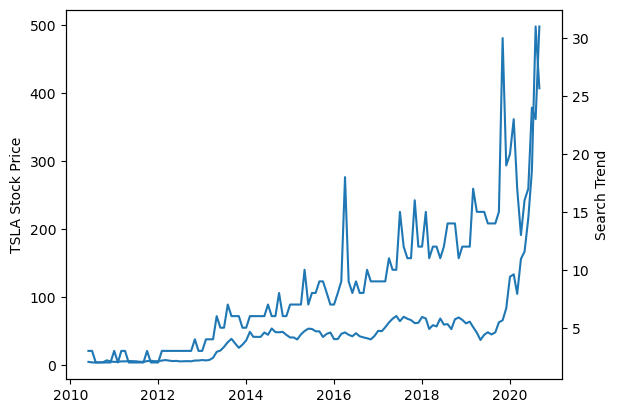

In [47]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')
ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH)

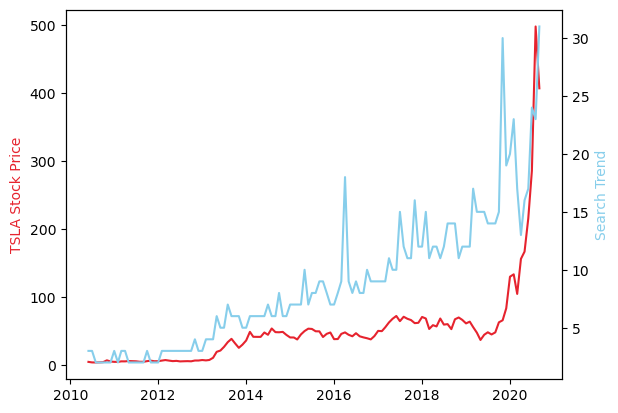

In [49]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('TSLA Stock Price',color ='#E6232E')
ax2.set_ylabel('Search Trend',color ='skyblue')
ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE, color = '#E6232E')
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,color= 'skyblue')

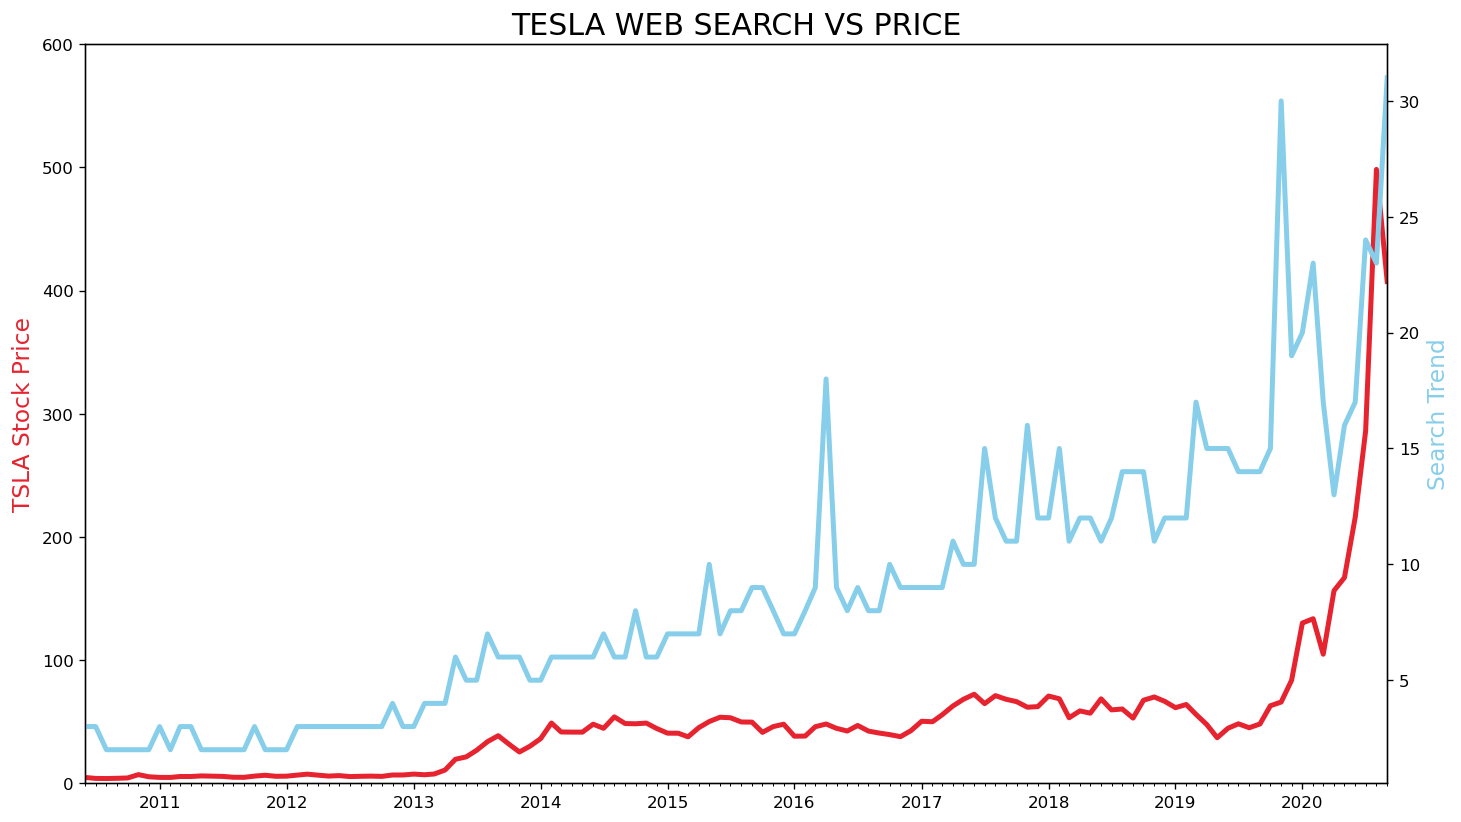

In [61]:
plt.figure(figsize=(14,8),dpi=120) #dpi dots-per-inch
plt.title('TESLA WEB SEARCH VS PRICE',fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('TSLA Stock Price',color ='#E6232E',fontsize =14)
ax2.set_ylabel('Search Trend',color ='skyblue',fontsize = 14)
ax1.set_ylim([0,600])
ax1.set_xlim([df_tesla.MONTH.min(),df_tesla.MONTH.max()])
ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE, color = '#E6232E',linewidth = 3)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,color= 'skyblue',linewidth = 3)
#to create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

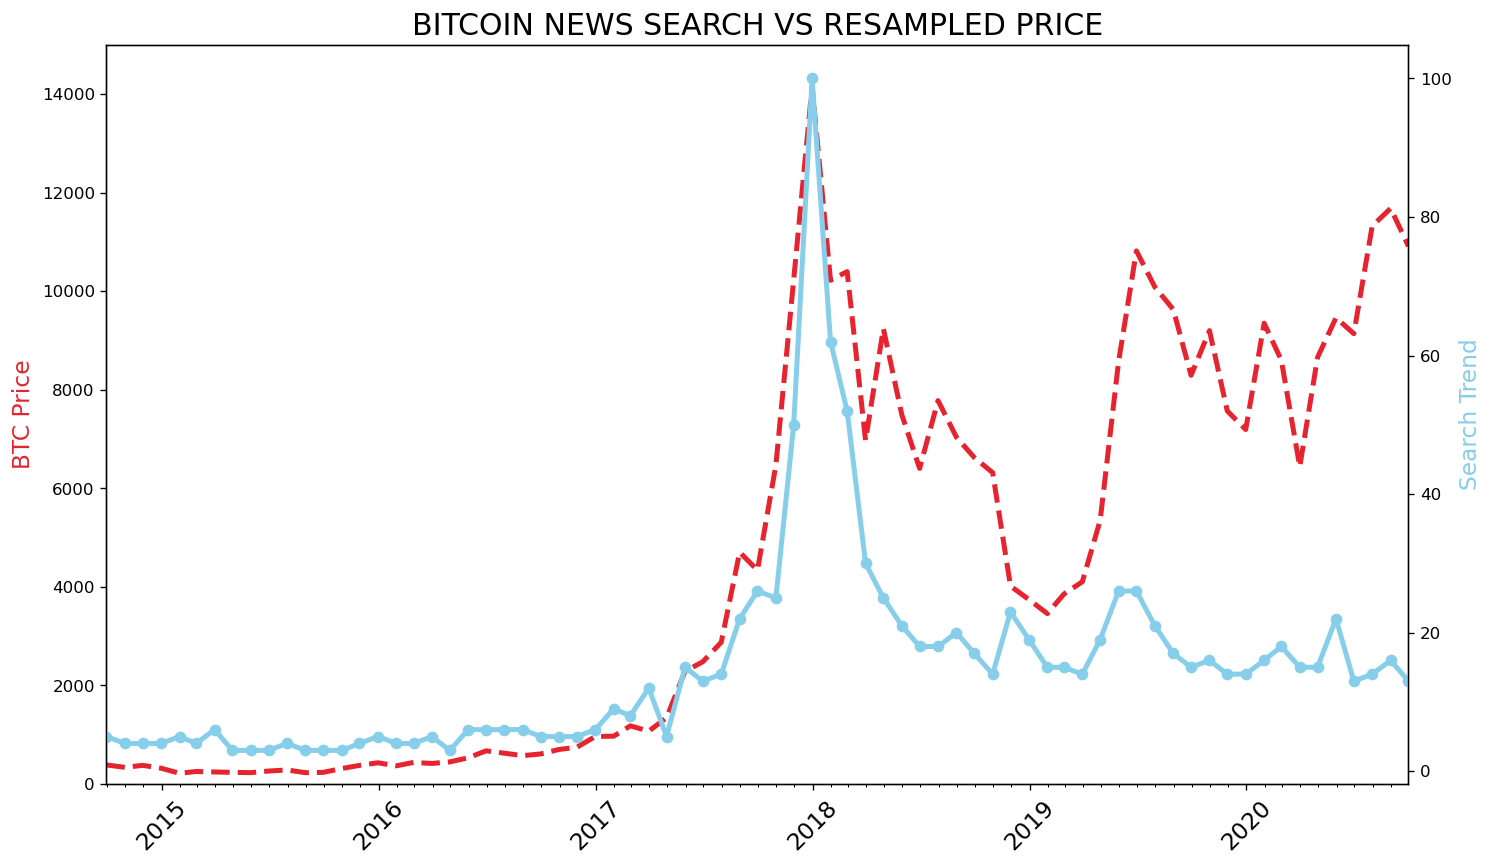

In [74]:
plt.figure(figsize=(14,8),dpi=120) #dpi dots-per-inch
plt.title('BITCOIN NEWS SEARCH VS RESAMPLED PRICE',fontsize=18)
plt.xticks(fontsize = 14,rotation = 45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('BTC Price',color ='#E6232E',fontsize =14)
ax2.set_ylabel('Search Trend',color ='skyblue',fontsize = 14)
ax1.set_ylim(bottom= 0, top = 15000)
ax1.set_xlim([df_btcPriceM.index.min(),df_btcPriceM.index.max()])

ax1.plot(df_btcPriceM.index,df_btcPriceM.CLOSE, color = '#E6232E',linewidth = 3,linestyle = '--')
ax2.plot(df_btcPriceM.index,df_btcSearch.BTC_NEWS_SEARCH,color= 'skyblue',linewidth = 3,marker ='o')
#to create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

Huge Spike in search and price late 2017/early 2018.
Big price jump but small search increase in early 2019

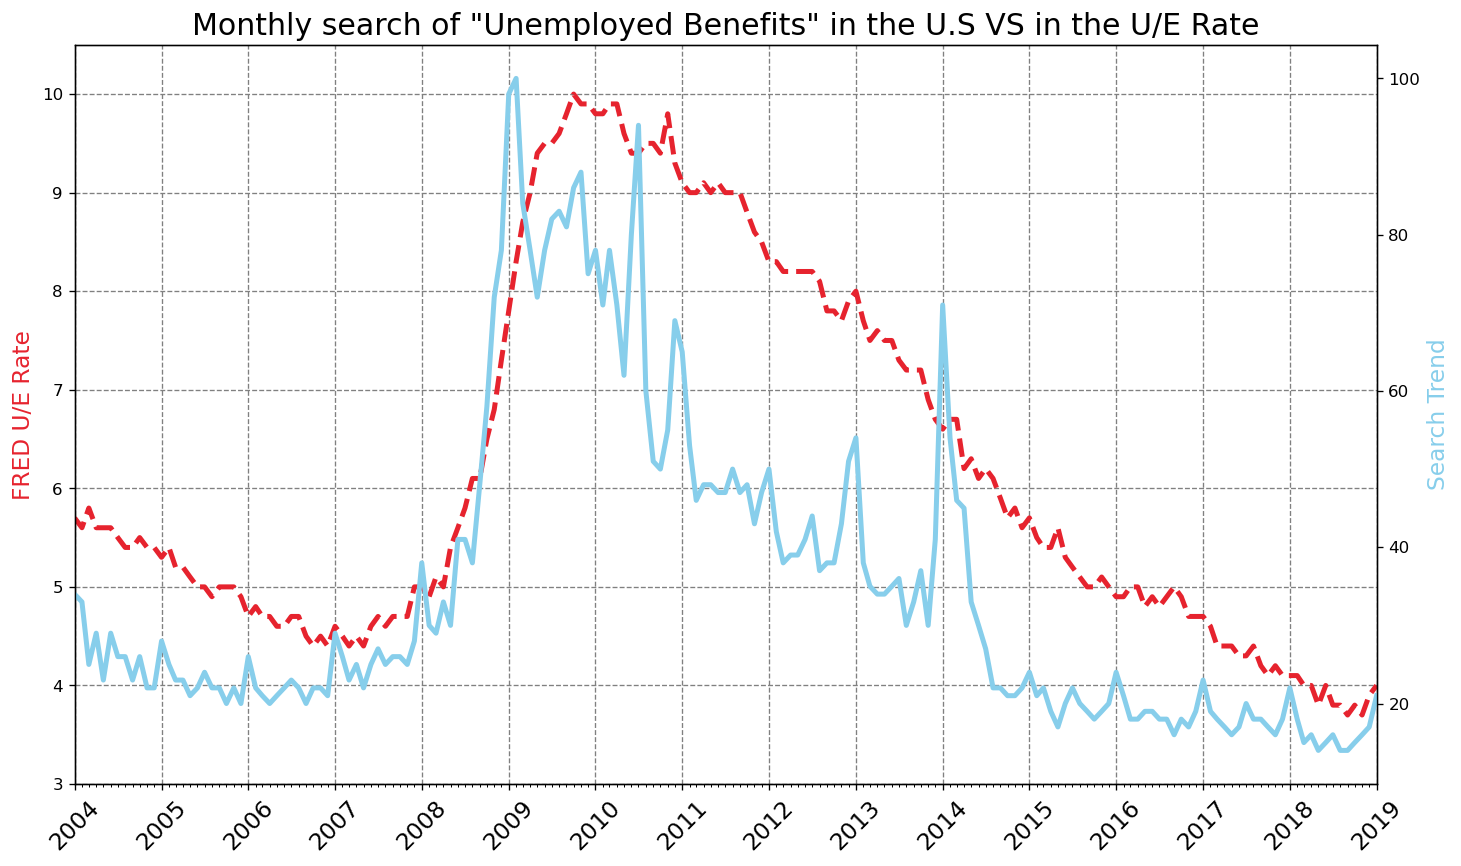

In [75]:
plt.figure(figsize=(14,8),dpi=120) #dpi dots-per-inch
plt.title('Monthly search of "Unemployed Benefits" in the U.S VS in the U/E Rate',fontsize=18)
plt.xticks(fontsize = 14,rotation = 45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('FRED U/E Rate',color ='#E6232E',fontsize =14)
ax2.set_ylabel('Search Trend',color ='skyblue',fontsize = 14)
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom= 3, top = 10.5)
ax1.set_xlim([df_unemployment.MONTH.min(),df_unemployment.MONTH.max()])

ax1.grid(color="grey", linestyle='--')

ax1.plot(df_unemployment.MONTH,df_unemployment.UNRATE, color = '#E6232E',linewidth = 3,linestyle = '--')
ax2.plot(df_unemployment.MONTH,df_unemployment.UE_BENEFITS_WEB_SEARCH,color= 'skyblue',linewidth = 3)

plt.show()

Many of the spikes are at year-end - in December. This clearly shows that there is seasonality in the job market.Also,financial crisis in 2007/2008 caused a massive spike in unemployment. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis. 

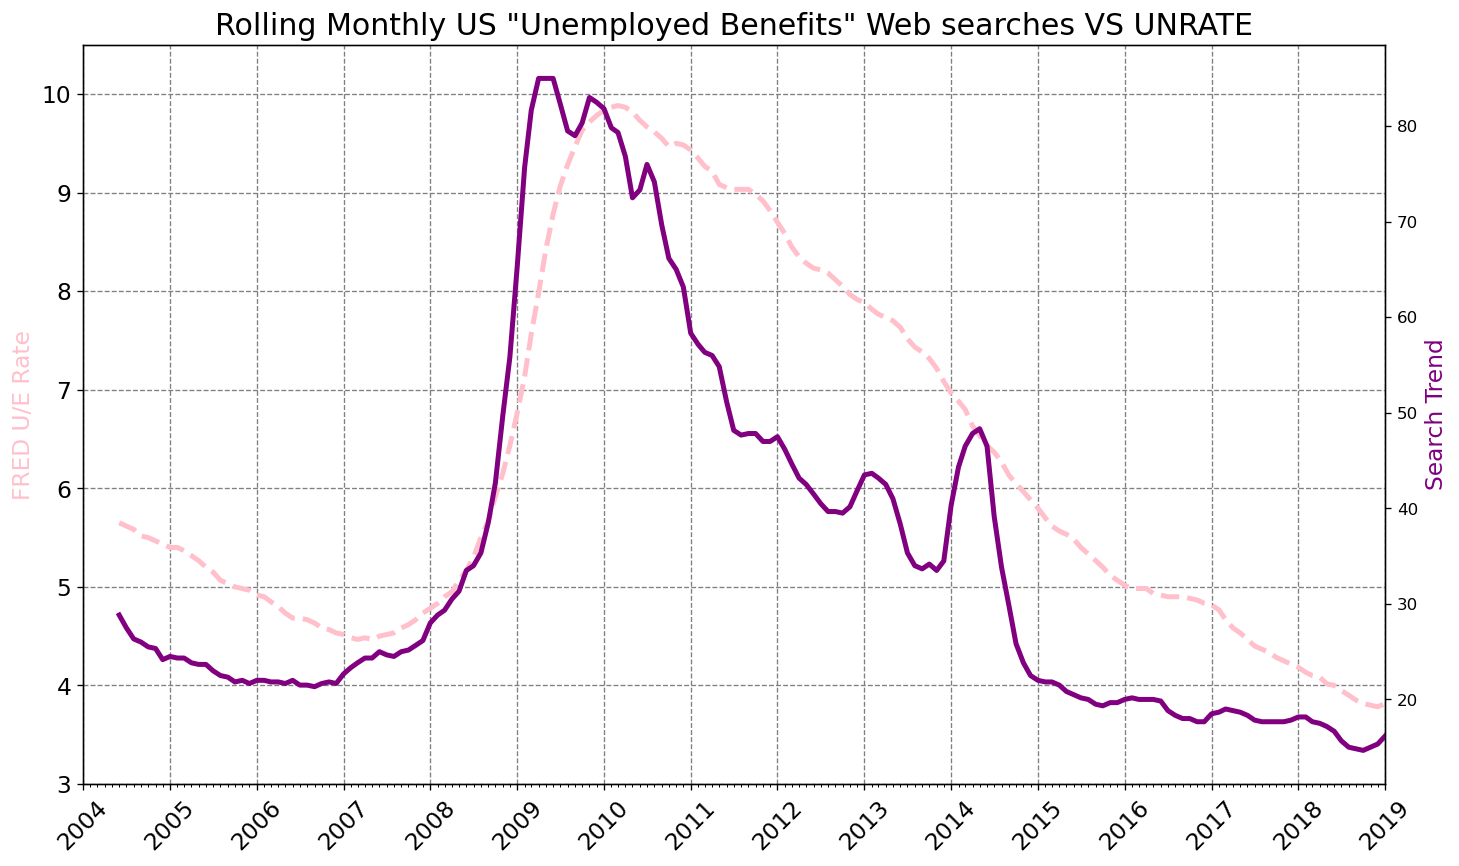

In [88]:

plt.figure(figsize=(14,8),dpi=120) #dpi dots-per-inch
plt.title('Rolling Monthly US "Unemployed Benefits" Web searches VS UNRATE',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize = 14,rotation = 45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('FRED U/E Rate',color ='pink',fontsize =14)
ax2.set_ylabel('Search Trend',color ='purple',fontsize = 14)
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom= 3, top = 10.5)
ax1.set_xlim([df_unemployment.MONTH[0],df_unemployment.MONTH.max()])

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
ax1.grid(color="grey", linestyle='--')

ax1.plot(df_unemployment.MONTH,roll_df.UNRATE, color = 'pink',linewidth = 3,linestyle = '--')
ax2.plot(df_unemployment.MONTH,roll_df.UE_BENEFITS_WEB_SEARCH,color= 'purple',linewidth = 3)



plt.show()






In [81]:
roll_df

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
176,14.833333,3.850000
177,14.666667,3.816667
178,15.000000,3.800000
179,15.333333,3.783333


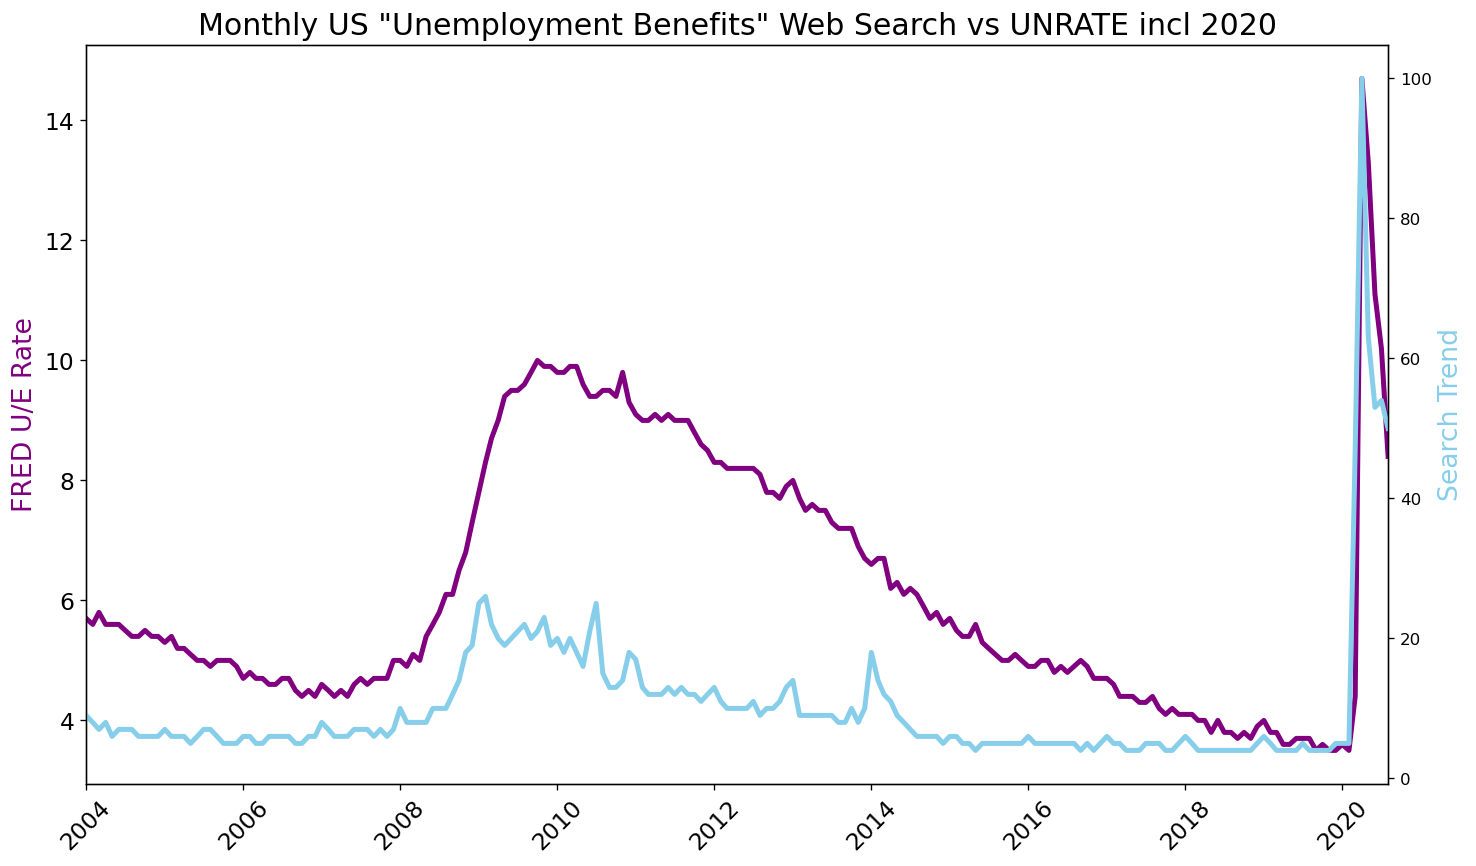

In [90]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)


plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])
 
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

During the COVID pandemic, the US unemployment rate surged to levels much higher than those seen during the financial crisis.